In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv')

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/09/2023,"1,977.20","1,980.50","1,987.80","1,971.00",130.41K,-0.07%
1,06/08/2023,"1,978.60","1,956.20","1,985.70","1,955.20",191.84K,1.03%
2,06/07/2023,"1,958.40","1,980.00","1,986.50","1,955.40",189.53K,-1.17%
3,06/06/2023,"1,981.50","1,978.00","1,982.90","1,970.30",136.00K,0.36%
4,06/05/2023,"1,974.30","1,962.30","1,980.40","1,953.80",179.99K,0.24%
...,...,...,...,...,...,...,...
1425,12/07/2017,"1,253.10","1,265.20","1,266.80","1,245.80",326.47K,-1.03%
1426,12/06/2017,"1,266.10","1,268.30","1,271.80","1,264.80",253.05K,0.09%
1427,12/05/2017,"1,264.90","1,279.10","1,279.80","1,263.20",334.83K,-1.00%
1428,12/04/2017,"1,277.70","1,277.60","1,280.50","1,273.50",262.07K,-0.36%


# PREPROCESSING DATA

In [ ]:
df = df[['Price']]
# Flip the column
df = df.iloc[::-1]

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Drop missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# SPLITTING DATA(7-2-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# LINEAR REGRESSION

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

In [ ]:
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2264.67234191 2265.44774937 2266.22315683 2266.99856429 2267.77397175
 2268.54937921 2269.32478667 2270.10019413 2270.87560159 2271.65100905
 2272.42641651 2273.20182397 2273.97723143 2274.75263889 2275.52804635
 2276.30345382 2277.07886128 2277.85426874 2278.6296762  2279.40508366
 2280.18049112 2280.95589858 2281.73130604 2282.5067135  2283.28212096
 2284.05752842 2284.83293588 2285.60834334 2286.3837508  2287.15915826]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  270.59573346990453
Testing MAE:  236.43753989154743
Testing MAPE:  13.444977098065255
Validation RMSE:  302.4902755384373
Validation MAE:  296.84210658515633
Validation MAPE:  15.68241635536601


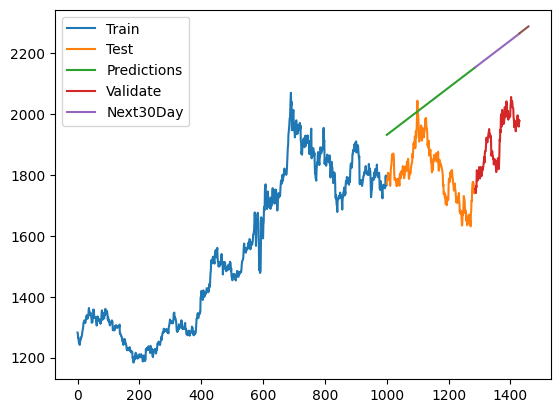

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4166.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:35:24   Log-Likelihood:                -8979.6
No. Observations:                1430   AIC:                         1.796e+04
Df Residuals:                    1428   BIC:                         1.797e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1251.0831      6.829    183.210      0.0

# SPLITTING DATA(6-3-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2383.20893454 2384.09030021 2384.97166589 2385.85303156 2386.73439724
 2387.61576291 2388.49712858 2389.37849426 2390.25985993 2391.14122561
 2392.02259128 2392.90395695 2393.78532263 2394.6666883  2395.54805398
 2396.42941965 2397.31078532 2398.192151   2399.07351667 2399.95488234
 2400.83624802 2401.71761369 2402.59897937 2403.48034504 2404.36171071
 2405.24307639 2406.12444206 2407.00580774 2407.88717341 2408.76853908]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  302.6021327968143
Testing MAE:  263.8330535842707
Testing MAPE:  14.898038440333025
Validation RMSE:  410.7648104302375
Validation MAE:  407.0352214036461
Validation MAPE:  21.433909807167367


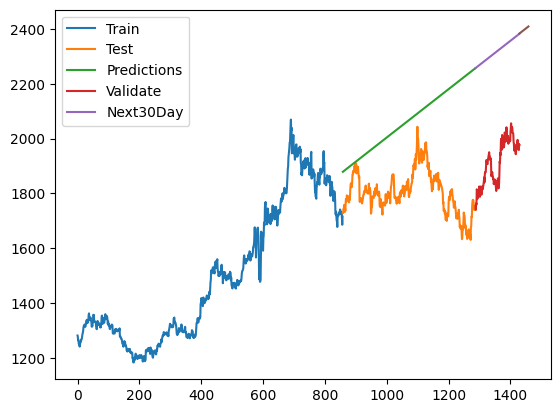

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4166.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:35:25   Log-Likelihood:                -8979.6
No. Observations:                1430   AIC:                         1.796e+04
Df Residuals:                    1428   BIC:                         1.797e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1251.0831      6.829    183.210      0.0

# SPLITTING DATA(5-3-2)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2332.98180256 2333.8218934  2334.66198424 2335.50207507 2336.34216591
 2337.18225674 2338.02234758 2338.86243842 2339.70252925 2340.54262009
 2341.38271092 2342.22280176 2343.0628926  2343.90298343 2344.74307427
 2345.5831651  2346.42325594 2347.26334677 2348.10343761 2348.94352845
 2349.78361928 2350.62371012 2351.46380095 2352.30389179 2353.14398263
 2353.98407346 2354.8241643  2355.66425513 2356.50434597 2357.34443681]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  143.48196013458443
Testing MAE:  128.582060056414
Testing MAPE:  7.03800088187798
Validation RMSE:  388.8902629007522
Validation MAE:  380.27859279071225
Validation MAPE:  21.04061468925443


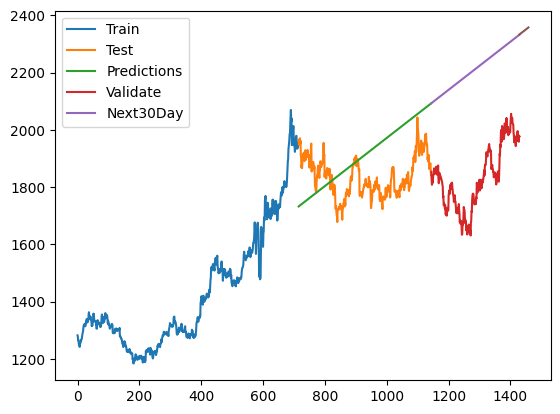

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4166.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:35:25   Log-Likelihood:                -8979.6
No. Observations:                1430   AIC:                         1.796e+04
Df Residuals:                    1428   BIC:                         1.797e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1251.0831      6.829    183.210      0.0

# Evaluating model

---
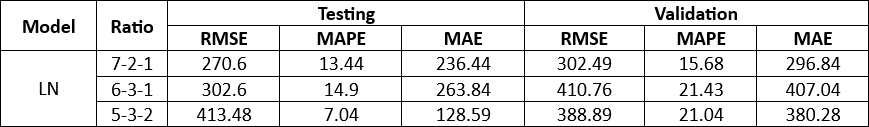
